In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-lifetime-value-analytics-case-study/customer_acquisition_data.csv


E-commerce Store is an online retailer specializing in consumer electronics. They have been in operation for several years and have built a substantial customer base. Store wants to understand the lifetime value of their customers to optimize their marketing strategies and improve customer retention.

**Objectives:**

Calculate the customer lifetime value for different segments of customers.
Identify the most valuable customer segments.
Develop personalized marketing strategies to increase customer retention and maximize CLV.

**Data Collection:**
Store collects various data points about their customers, including:
Customer demographics (age, gender, location, etc.)
Purchase history (transaction dates, order values, products purchased, etc.)
Website behavior (pages visited, time spent, etc.)
Customer interactions (customer service inquiries, feedback, etc.)
Data Preparation:
To perform CLV analysis, we need to aggregate and organize the collected data. They merge customer demographic information with purchase history and website behavior data to create a comprehensive dataset for analysis.Store calculates the CLV for each customer and then segments them based on their CLV values.

**Segmentation and Analysis:**
Store segments their customers into three groups based on CLV:

High-Value Customers: Customers with CLV in the top 20% percentile. These customers generate the most revenue for the business.

Medium-Value Customers: Customers with CLV in the middle 60% percentile. These customers contribute to the overall revenue and have decent long-term potential.

Low-Value Customers: Customers with CLV in the bottom 20% percentile. These customers have low spending patterns and may require additional nurturing to increase their CLV.

Store analyzes the behavior, preferences, and characteristics of each customer segment to identify patterns and insights that can inform their marketing strategies.

**Marketing Strategies:**
Based on the analysis, store formulates the following marketing strategies:

High-Value Customers:
Offer personalized recommendations and exclusive deals based on their purchase history.
Provide excellent customer service and priority support to ensure their loyalty.
Implement a loyalty program to reward their continued patronage.
Medium-Value Customers:
Create targeted email campaigns to showcase new products and promotions.
Use retargeting ads to remind them of products they have shown interest in.
Offer limited-time discounts to encourage repeat purchases.
Low-Value Customers:
Implement a win-back campaign to re-engage with these customers.
Send personalized offers and discounts to encourage them to make additional purchases.
Collect feedback and address any concerns to improve their experience.

**Monitoring and Evaluation:**
Store continuously monitors the effectiveness of their marketing strategies by tracking CLV over time and assessing changes in customer behavior. They analyze metrics such as repeat purchase rate, average order value, and customer retention rate to evaluate the success of their initiatives.

By leveraging CLV analytics, Store can allocate their marketing resources effectively, focus on customer segments with the highest potential, and develop strategies to maximize customer retention and long-term profitability.

This case study demonstrates the practical application of CLV analytics in a real-world scenario and highlights the importance of data-driven decision-making for optimizing business performance.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


# **Data Loading and Data Exploration**

In [3]:
df=pd.read_csv('/kaggle/input/customer-lifetime-value-analytics-case-study/customer_acquisition_data.csv')


In [4]:
df.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [5]:

df

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419
...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813
796,797,email marketing,5.246263,0.043822,3439
797,798,social media,9.546326,0.167592,2101
798,799,paid advertising,30.450327,0.016341,813


In [6]:
df.isnull().sum()

customer_id        0
channel            0
cost               0
conversion_rate    0
revenue            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


In [8]:
df.columns

Index(['customer_id', 'channel', 'cost', 'conversion_rate', 'revenue'], dtype='object')

In [9]:
df.shape

(800, 5)

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer_id,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
cost,800.0,13.148052,9.922337,5.246263,5.246263,8.320327,9.546326,30.450327
conversion_rate,800.0,0.086305,0.059611,0.016341,0.043822,0.043822,0.123145,0.167592
revenue,800.0,2769.151250,1259.543706,500.000000,1694.000000,2764.000000,3824.250000,4998.000000


Text(0.5, 1.0, 'Distribution of Cost')

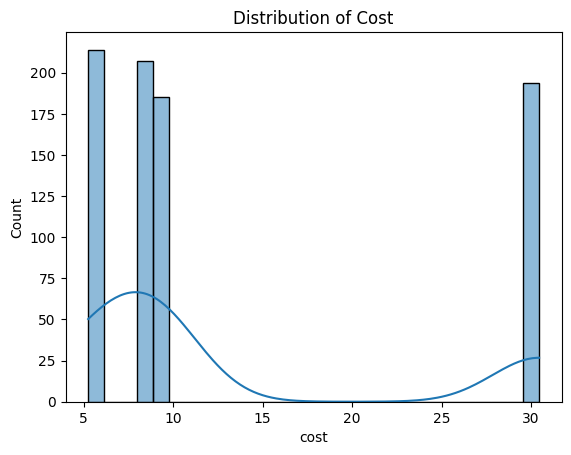

In [11]:
sns.histplot(df, x='cost', kde=True)
plt.title('Distribution of Cost')

Text(0.5, 1.0, 'Distribution of Revenue')

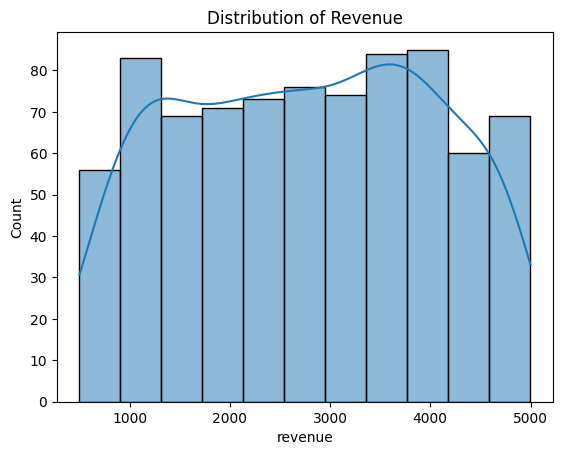

In [12]:


sns.histplot(df, x='revenue', kde=True);
plt.title('Distribution of Revenue')

# **Data Agregation**

Grouping and summarizing data through aggregation
Aggregating data permits us to compute condensed statistics and acquire an understanding of the typical performance of distinct groups.

We have the capability to group the data according to the acquisition channel to evaluate the efficiency of each channel. As an illustration, we can determine the mean values of 'cost,' 'conversion_rate,' and 'revenue' for each channel, enabling us to discern which channels exhibit the highest effectiveness.

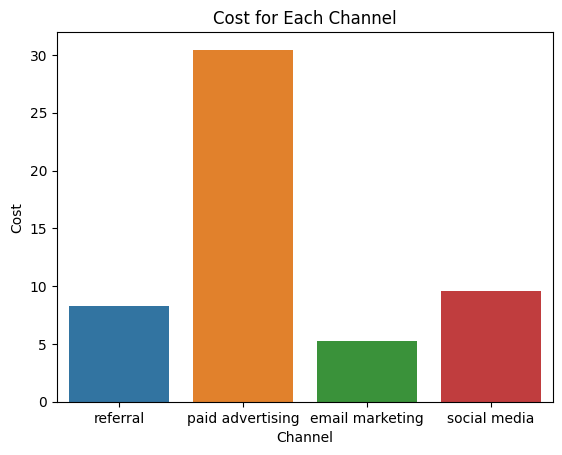

In [13]:
sns.barplot(x='channel', y='cost', data=df)
plt.xlabel('Channel')
plt.ylabel('Cost')
plt.title('Cost for Each Channel')
plt.show()

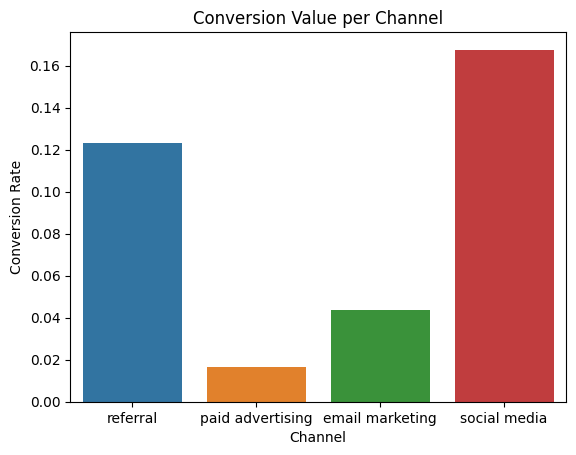

In [14]:
# 'conversion_rate' for each channel group
sns.barplot(x='channel', y='conversion_rate', data=df)
plt.xlabel('Channel')
plt.ylabel('Conversion Rate')
plt.title('Conversion Value per Channel')
plt.show()

Text(0.5, 1.0, 'Revenue per Channel')

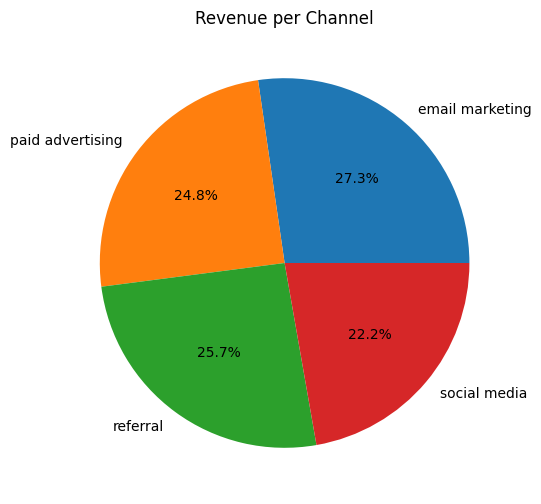

In [15]:
# Grouping the data based on 'channel'
channel_groups = df.groupby('channel')
# Aggregating 'revenue' for each channel group
revenue_by_channel = channel_groups['revenue'].sum().reset_index()

fig, ax = plt.subplots(figsize=(8, 6))
plt.pie(revenue_by_channel['revenue'], labels=revenue_by_channel['channel'], autopct='%1.1f%%');
plt.title('Revenue per Channel')

# **ROI Calculation**
Return on Investment (ROI) serves as a financial gauge employed to assess the profitability and effectiveness of an investment. It quantifies the return or profit derived from an investment in comparison to its initial cost.

Mathematically, ROI can be expressed as:

ROI = (Revenue - Cost) / Cost
This metric is pivotal for analyzing the viability of investments and making informed financial decisions.


In [16]:

df['roi'] = (df['revenue'] - df['cost']) / df['cost']
df.head()

,customer_id,channel,cost,conversion_rate,revenue,roi
0,1,referral,8.320327,0.123145,4199,503.667681
1,2,paid advertising,30.450327,0.016341,3410,110.985660
2,3,email marketing,5.246263,0.043822,3164,602.095925
3,4,social media,9.546326,0.167592,1520,158.223564
4,5,referral,8.320327,0.123145,2419,289.733775


**ROI BY Channel**

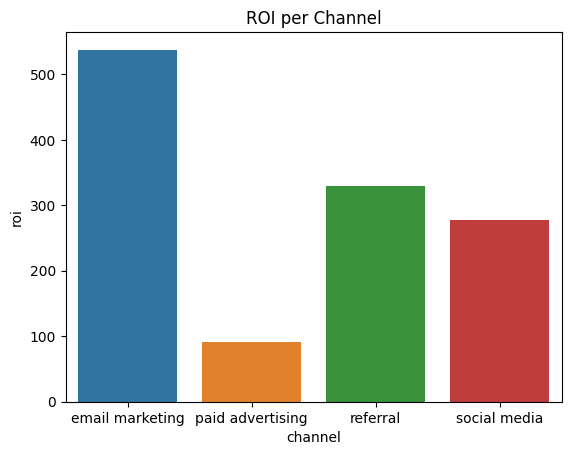

In [17]:
roi_by_channel = df.groupby('channel')['roi'].mean().reset_index()

sns.barplot(roi_by_channel, x='channel', y='roi');
plt.title('ROI per Channel')
plt.show()


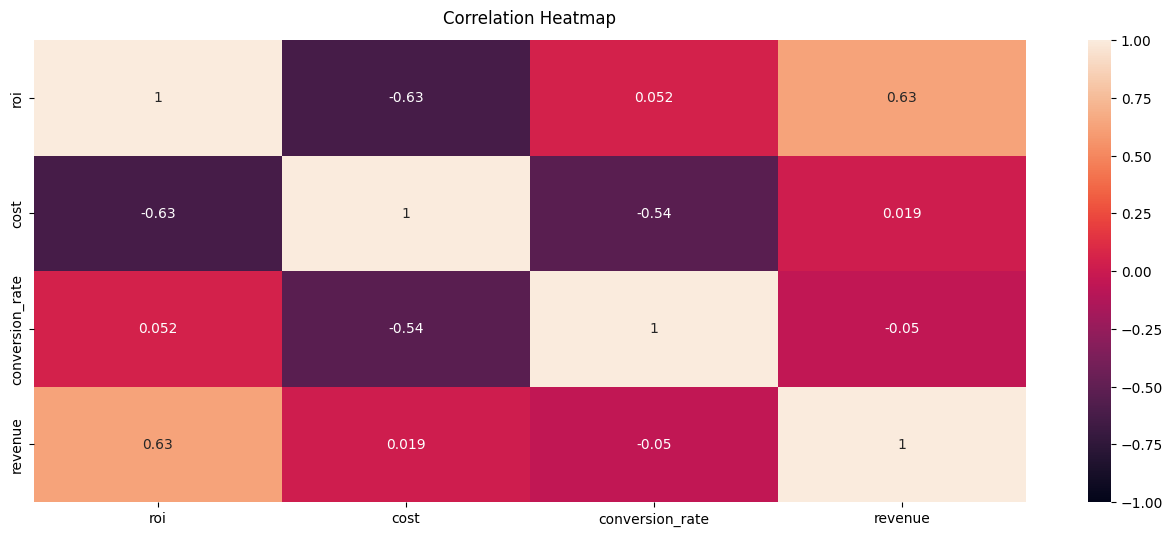

In [18]:
# Computing the correlation matrix
corr = df[['roi', 'cost', 'conversion_rate', 'revenue']].corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')


# **Customer Lifetime Value (CLTV)**
CLTV (Customer Lifetime Value) analysis is a technique employed by enterprises to gauge the cumulative value a customer is expected to generate throughout their entire association with the company. This metric proves invaluable in providing insights into the enduring profitability and significance of a company's customer base.

Mathematically, CLTV can be represented as:
CLTV = (Revenue - Cost) × Conversion Rate / Cost

In [19]:
df['cltv'] = (df['revenue'] - df['cost']) * df['conversion_rate'] / df['cost']
df.head()

,customer_id,channel,cost,conversion_rate,revenue,roi,cltv
0,1,referral,8.320327,0.123145,4199,503.667681,62.024146
1,2,paid advertising,30.450327,0.016341,3410,110.985660,1.813671
2,3,email marketing,5.246263,0.043822,3164,602.095925,26.385185
3,4,social media,9.546326,0.167592,1520,158.223564,26.517043
4,5,referral,8.320327,0.123145,2419,289.733775,35.679260


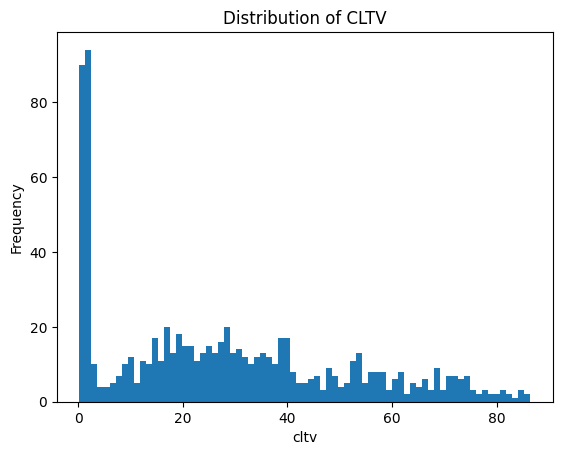

In [20]:
plt.hist(df['cltv'], bins=75)
plt.xlabel('cltv')
plt.ylabel('Frequency')
plt.title('Distribution of CLTV')
plt.show()

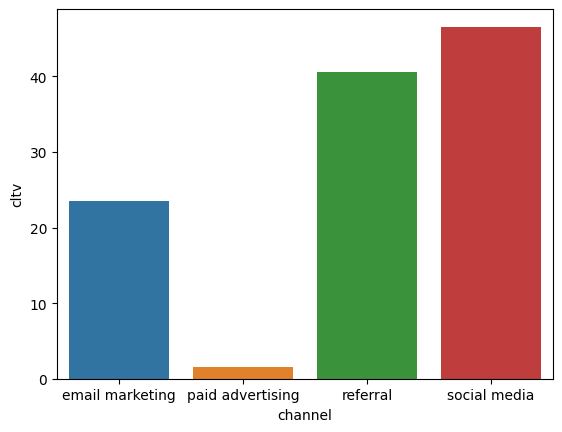

In [21]:

#CLTV by Channel

cltv_by_channel = df.groupby('channel')['cltv'].mean().reset_index()

sns.barplot(cltv_by_channel, x='channel', y='cltv');

According to the analysis, it becomes evident that referral and social media channels emerge as the most efficient avenues for generating elevated Customer Lifetime Value (CLTV). 
Email marketing also exhibits commendable performance, whereas paid advertising falls behind concerning CLTV.

# **Customer Segmentation**

In [22]:
# Calculate the CLTV percentile values
cltv_percentiles = df['cltv'].quantile([0.2, 0.8])

# Define a function to categorize customers
def categorize_customer(cltv):
    if cltv >= cltv_percentiles[0.8]:
        return 'High-Value Customer'
    elif cltv >= cltv_percentiles[0.2]:
        return 'Medium-Value Customer'
    else:
        return 'Low-Value Customer'

# Apply the categorization function to create a new 'customer_category' column
df['customer_category'] = df['cltv'].apply(categorize_customer)



In [23]:
df.head

<bound method NDFrame.head of      customer_id           channel       cost  conversion_rate  revenue  \
0              1          referral   8.320327         0.123145     4199   
1              2  paid advertising  30.450327         0.016341     3410   
2              3   email marketing   5.246263         0.043822     3164   
3              4      social media   9.546326         0.167592     1520   
4              5          referral   8.320327         0.123145     2419   
..           ...               ...        ...              ...      ...   
795          796      social media   9.546326         0.167592     2813   
796          797   email marketing   5.246263         0.043822     3439   
797          798      social media   9.546326         0.167592     2101   
798          799  paid advertising  30.450327         0.016341      813   
799          800   email marketing   5.246263         0.043822     4820   

            roi       cltv      customer_category  
0    503.667681  

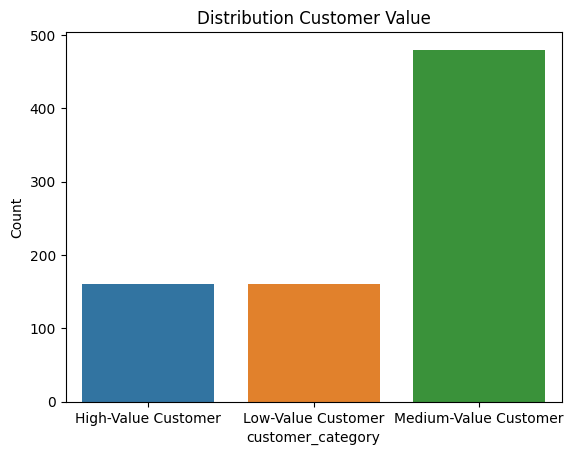

In [24]:
sns.countplot(x='customer_category', data=df)
plt.xlabel('customer_category')
plt.ylabel('Count')
plt.title('Distribution Customer Value')
plt.show()

In [25]:
#CLTV by Channel

custcat_by_channel = df.groupby('channel')['customer_category'].count().reset_index()

In [26]:
# Use the pd.crosstab function to create the cross-tabulation,add margins to see row and column totals
cross_tab_with_margins = pd.crosstab(df['customer_category'], df['channel'], margins=True, margins_name="Total")
print(cross_tab_with_margins.transpose())


customer_category  High-Value Customer  Low-Value Customer  \
channel                                                      
email marketing                      0                   0   
paid advertising                     0                 160   
referral                            78                   0   
social media                        82                   0   
Total                              160                 160   

customer_category  Medium-Value Customer  Total  
channel                                          
email marketing                      214    214  
paid advertising                      34    194  
referral                             129    207  
social media                         103    185  
Total                                480    800  


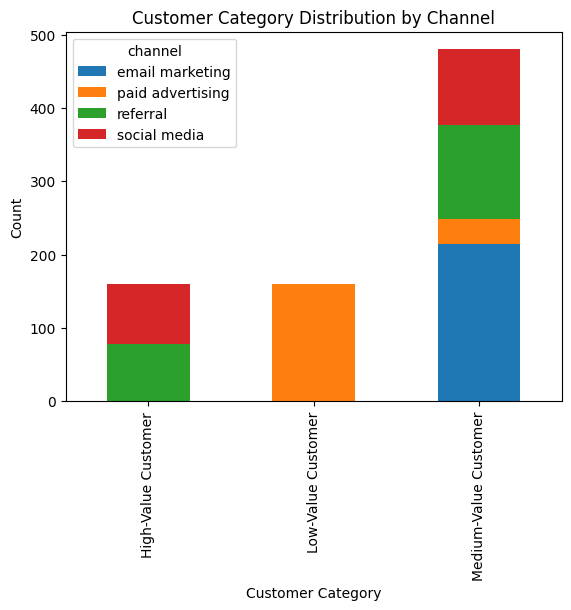

In [27]:
# Use the pd.crosstab function to create the cross-tabulation
cross_tab = pd.crosstab(df['customer_category'], df['channel'])

cross_tab.plot(kind='bar', stacked=True)  # You can change 'stacked' to False for an unstacked bar chart

# Add labels and a title
plt.xlabel('Customer Category')
plt.ylabel('Count')
plt.title('Customer Category Distribution by Channel')

# Show the plot
plt.show()



In segmented data analysis, paid marketing tends to appeal to Low-Value and Medium-Value customers, whereas High-Value customers are primarily drawn to Referrals and Social Media channels.

<Axes: xlabel='channel', ylabel='cltv'>

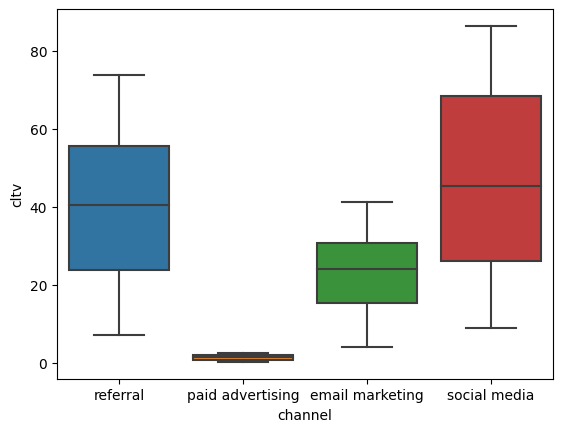

In [28]:
# boxplot shows the distribution of quantitative data
sns.boxplot(x="channel", y="cltv", data=df)

# **Summary & Conclusion**
In this project, we delved into the concept of Customer Lifetime Value (CLTV) and its correlation with various marketing channels.

We conducted Exploratory Data Analysis (EDA) to delve into the data's distribution and characteristics. A variety of visualizations, such as histograms, bar charts, pie charts, box plots, and heatmaps, were employed to scrutinize variable distributions, unveil patterns, and decipher relationships between variables.

Additionally, we performed aggregations, including the computation of average costs, conversion rates, and total revenue per channel. This provided an overarching perspective on how different channels contribute to the overall outcomes.

Conducting Return on Investment (ROI) analysis allowed us to gauge the profitability and efficacy of each channel in revenue generation.

Furthermore, we estimated the Customer Lifetime Value (CLTV) for each channel, granting us insights into the enduring value generated by customers acquired through distinct channels.We segmented customers into 3 groups based on Lifetime value.

Ultimately, this analysis yielded valuable insights that can serve as a compass for resource allocation, the formulation of marketing strategies, and channel optimization initiatives, all aimed at maximizing long-term customer value and bolstering business prosperity.